In [1]:
from deap import tools
from deap import base
import scipy.io as sio
import numpy 
import random
import math
import matplotlib.pyplot as plt
import spectral.io.envi as envi
import itertools
toolbox = base.Toolbox()
sigma_MIN = 3
random.seed(128)
mutation_probability = 0.7
def random_mutation(individual, number_pixels, number_endmembers):
    return random.sample(set(individual + random.sample(range(0,number_pixels), number_endmembers)), number_endmembers)
def gaussian_mutation(individual, number_rows, number_columns):
    gene_x = (numpy.array(individual) / number_rows).astype(int)
    gene_y = (numpy.array(individual) % number_rows)
    
    mut_x = abs(toolbox.gaussian_mutation_op(gene_x.copy())[0] % number_columns-1)
    mut_y = abs(toolbox.gaussian_mutation_op(gene_y.copy())[0] % number_rows-1)
    
    mutant = mut_x*number_rows+mut_y
    return mutant

c:\users\douglas.soares\appdata\local\continuum\anaconda3\envs\ehsi\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


Repeated genes for random mutation:  0
Repeated genes for random mutation:  0


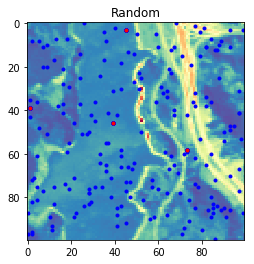

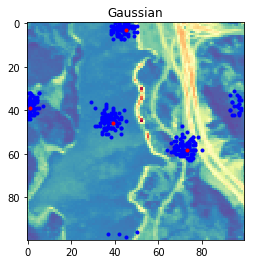

In [2]:
envi_data = envi.open('../data/real/jasper/jasper.hdr')
jasper_envi = envi_data[:,:,:]
jasper_path = '../data/real/jasper/jasper.mat'
data = sio.loadmat(jasper_path)
gt_jasper_path = '../data/real/jasper/jasper.gt'
gt = sio.loadmat(gt_jasper_path)
M_gt = gt['M']

number_rows = data['nRow'][0][0]
number_columns = data['nCol'][0][0]
number_pixels = int(number_rows)*int(number_columns)
number_endmembers = M_gt.shape[1]

toolbox.register("gaussian_mutation_op", tools.mutGaussian, mu=0, sigma=sigma_MIN, indpb=1.0)
toolbox.register("gaussian_mutation", gaussian_mutation, number_rows=number_rows, number_columns=number_columns)
toolbox.register("random_mutation", random_mutation, number_pixels=number_pixels, number_endmembers=number_endmembers)
individual = list(numpy.random.choice(list(range(0,number_pixels)), number_endmembers))
r_x = list(map(lambda x: math.floor(x/number_rows),individual))
r_y = list(map(lambda x: math.floor(x%number_rows),individual))

random_l = []
gaussian_l = []
random_count = 0
gaussian_count = 0
for i in range(0,100):
    mutant = toolbox.random_mutation(individual.copy())
    if len(set(mutant)) < number_endmembers:
        random_count += 1
    random_l.extend(mutant)
    mutant = toolbox.gaussian_mutation(individual.copy())
    if len(set(mutant)) < number_endmembers:
        gaussian_count += 1
    gaussian_l.extend(mutant)

print("Repeated genes for random mutation: ", random_count)
print("Repeated genes for random mutation: ", gaussian_count)
    
plt.imshow(jasper_envi[:,:,30],cmap=plt.get_cmap('Spectral_r'))
x = list(map(lambda z: math.floor(z/number_rows),random_l))
y = list(map(lambda z: math.floor(z%number_rows),random_l))
# plt.axis('off')
plt.title('Random')
plt.plot(y,x,'.b')
plt.plot(r_y,r_x,'.r');
plt.show()
plt.imshow(jasper_envi[:,:,30],cmap=plt.get_cmap('Spectral_r'))
x = list(map(lambda z: math.floor(z/number_rows),gaussian_l))
y = list(map(lambda z: math.floor(z%number_rows),gaussian_l))
# plt.axis('off')
plt.title('Gaussian')
plt.plot(y,x,'.b')
plt.plot(r_y,r_x,'.r');

Repeated genes for random mutation:  0
Repeated genes for random mutation:  0


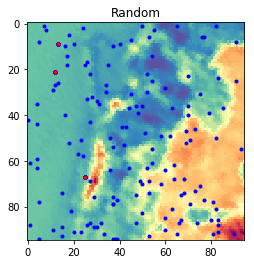

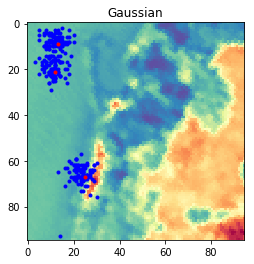

In [3]:
envi_data = envi.open('../data/real/samson/samson.hdr')
samson_envi = envi_data[:,:,:]
samson_path = '../data/real/samson/samson.mat'
data = sio.loadmat(samson_path)
gt_samson_path = '../data/real/samson/samson.gt'
gt = sio.loadmat(gt_samson_path)
M_gt = gt['M']

number_rows = data['nRow'][0][0]
number_columns = data['nCol'][0][0]
number_pixels = int(number_rows)*int(number_columns)
number_endmembers = M_gt.shape[1]

toolbox.register("gaussian_mutation_op", tools.mutGaussian, mu=0, sigma=sigma_MIN, indpb=1.0)
toolbox.register("gaussian_mutation", gaussian_mutation, number_rows=number_rows, number_columns=number_columns)
toolbox.register("random_mutation", random_mutation, number_pixels=number_pixels, number_endmembers=number_endmembers)
individual = list(numpy.random.choice(list(range(0,number_pixels)), number_endmembers))
r_x = list(map(lambda x: math.floor(x/number_rows),individual))
r_y = list(map(lambda x: math.floor(x%number_rows),individual))

random_l = []
gaussian_l = []
random_count = 0
gaussian_count = 0
for i in range(0,100):
    mutant = toolbox.random_mutation(individual.copy())
    if len(set(mutant)) < number_endmembers:
        random_count += 1
    random_l.extend(mutant)
    mutant = toolbox.gaussian_mutation(individual.copy())
    if len(set(mutant)) < number_endmembers:
        gaussian_count += 1
    gaussian_l.extend(mutant)

print("Repeated genes for random mutation: ", random_count)
print("Repeated genes for random mutation: ", gaussian_count)
    
plt.imshow(samson_envi[:,:,30],cmap=plt.get_cmap('Spectral_r'))
x = list(map(lambda z: math.floor(z/number_rows),random_l))
y = list(map(lambda z: math.floor(z%number_rows),random_l))
# plt.axis('off')
plt.title('Random')
plt.plot(y,x,'.b')
plt.plot(r_y,r_x,'.r');
plt.show()
plt.imshow(samson_envi[:,:,30],cmap=plt.get_cmap('Spectral_r'))
x = list(map(lambda z: math.floor(z/number_rows),gaussian_l))
y = list(map(lambda z: math.floor(z%number_rows),gaussian_l))
# plt.axis('off')
plt.title('Gaussian')
plt.plot(y,x,'.b')
plt.plot(r_y,r_x,'.r');

Repeated genes for random mutation:  0
Repeated genes for random mutation:  0


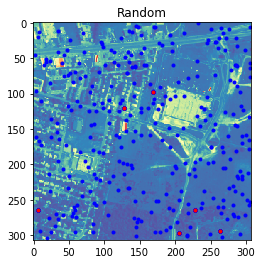

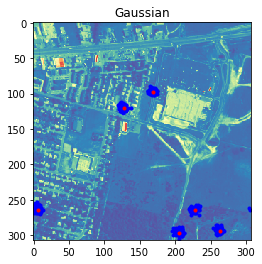

In [4]:
envi_data = envi.open('../data/real/urban/urban.hdr')
urban_envi = envi_data[:,:,:]
urban_path = '../data/real/urban/urban.mat'
data = sio.loadmat(urban_path)
gt_urban_path = '../data/real/urban/urban.gt'
gt = sio.loadmat(gt_urban_path)
M_gt = gt['M']

number_rows = data['nRow'][0][0]
number_columns = data['nCol'][0][0]
number_pixels = int(number_rows)*int(number_columns)
number_endmembers = M_gt.shape[1]

toolbox.register("gaussian_mutation_op", tools.mutGaussian, mu=0, sigma=sigma_MIN, indpb=1.0)
toolbox.register("gaussian_mutation", gaussian_mutation, number_rows=number_rows, number_columns=number_columns)
toolbox.register("random_mutation", random_mutation, number_pixels=number_pixels, number_endmembers=number_endmembers)
individual = list(numpy.random.choice(list(range(0,number_pixels)), number_endmembers))
r_x = list(map(lambda x: math.floor(x/number_rows),individual))
r_y = list(map(lambda x: math.floor(x%number_rows),individual))

random_l = []
gaussian_l = []
random_count = 0
gaussian_count = 0
for i in range(0,100):
    mutant = toolbox.random_mutation(individual.copy())
    if len(set(mutant)) < number_endmembers:
        random_count += 1
    random_l.extend(mutant)
    mutant = toolbox.gaussian_mutation(individual.copy())
    if len(set(mutant)) < number_endmembers:
        gaussian_count += 1
    gaussian_l.extend(mutant)

print("Repeated genes for random mutation: ", random_count)
print("Repeated genes for random mutation: ", gaussian_count)
    
plt.imshow(urban_envi[:,:,30],cmap=plt.get_cmap('Spectral_r'))
x = list(map(lambda z: math.floor(z/number_rows),random_l))
y = list(map(lambda z: math.floor(z%number_rows),random_l))
# plt.axis('off')
plt.title('Random')
plt.plot(y,x,'.b')
plt.plot(r_y,r_x,'.r');
plt.show()
plt.imshow(urban_envi[:,:,30],cmap=plt.get_cmap('Spectral_r'))
x = list(map(lambda z: math.floor(z/number_rows),gaussian_l))
y = list(map(lambda z: math.floor(z%number_rows),gaussian_l))
# plt.axis('off')
plt.title('Gaussian')
plt.plot(y,x,'.b')
plt.plot(r_y,r_x,'.r');

Repeated genes for random mutation:  0
Repeated genes for random mutation:  0


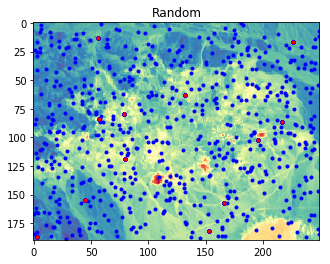

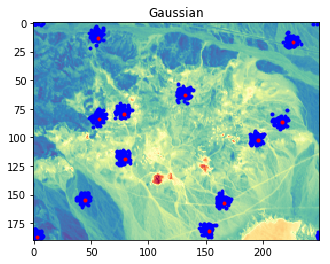

In [5]:
envi_data = envi.open('../data/real/cuprite/cuprite.hdr')
cuprite_envi = envi_data[:,:,:]
cuprite_path = '../data/real/cuprite/cuprite.mat'
data = sio.loadmat(cuprite_path)
gt_cuprite_path = '../data/real/cuprite/cuprite.gt'
gt = sio.loadmat(gt_cuprite_path)
M_gt = gt['M']

number_rows = data['nRow'][0][0]
number_columns = data['nCol'][0][0]
number_pixels = int(number_rows)*int(number_columns)
number_endmembers = M_gt.shape[1]

toolbox.register("gaussian_mutation_op", tools.mutGaussian, mu=0, sigma=sigma_MIN, indpb=1.0)
toolbox.register("gaussian_mutation", gaussian_mutation, number_rows=number_rows, number_columns=number_columns)
toolbox.register("random_mutation", random_mutation, number_pixels=number_pixels, number_endmembers=number_endmembers)
individual = list(numpy.random.choice(list(range(0,number_pixels)), number_endmembers))

r_x = list(map(lambda x: math.floor(x/number_rows),individual))
r_y = list(map(lambda x: math.floor(x%number_rows),individual))

random_l = []
gaussian_l = []
random_count = 0
gaussian_count = 0
for i in range(0,100):
    mutant = toolbox.random_mutation(individual.copy())
    if len(set(mutant)) < number_endmembers:
        random_count += 1
    random_l.extend(mutant)
    mutant = toolbox.gaussian_mutation(individual.copy())
    if len(set(mutant)) < number_endmembers:
        gaussian_count += 1
    gaussian_l.extend(mutant)

print("Repeated genes for random mutation: ", random_count)
print("Repeated genes for random mutation: ", gaussian_count)

plt.imshow(cuprite_envi[:,:,30].T,cmap=plt.get_cmap('Spectral_r'))
x = list(map(lambda z: math.floor(z/number_rows),random_l))
y = list(map(lambda z: math.floor(z%number_rows),random_l))
# plt.axis('off')
plt.title('Random')
plt.plot(y,x,'.b')
plt.plot(r_y,r_x,'.r');
plt.show()
plt.imshow(cuprite_envi[:,:,30].T,cmap=plt.get_cmap('Spectral_r'))
x = list(map(lambda z: math.floor(z/number_rows),gaussian_l))
y = list(map(lambda z: math.floor(z%number_rows),gaussian_l))
# plt.axis('off')
plt.title('Gaussian')
plt.plot(y,x,'.b')
plt.plot(r_y,r_x,'.r');

Repeated genes for random mutation:  0
Repeated genes for random mutation:  0


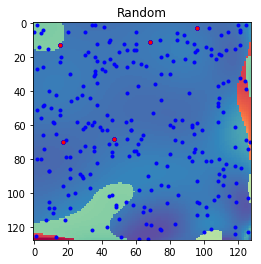

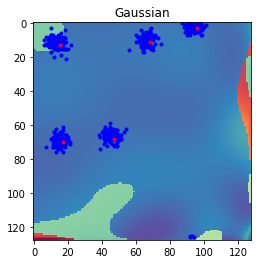

In [6]:
data = sio.loadmat('../data/synthetic/legendre/legendre.mat')

number_rows = data['syntheticImage'].shape[0]
number_columns = data['syntheticImage'].shape[1]
number_pixels = int(number_rows)*int(number_columns)
number_endmembers = data['endmembersGT'].shape[0]

toolbox.register("gaussian_mutation_op", tools.mutGaussian, mu=0, sigma=sigma_MIN, indpb=1.0)
toolbox.register("gaussian_mutation", gaussian_mutation, number_rows=number_rows, number_columns=number_columns)
toolbox.register("random_mutation", random_mutation, number_pixels=number_pixels, number_endmembers=number_endmembers)
individual = list(numpy.random.choice(list(range(0,number_pixels)), number_endmembers))

r_x = list(map(lambda x: math.floor(x/number_rows),individual))
r_y = list(map(lambda x: math.floor(x%number_rows),individual))

random_l = []
gaussian_l = []
random_count = 0
gaussian_count = 0
for i in range(0,100):
    mutant = toolbox.random_mutation(individual.copy())
    if len(set(mutant)) < number_endmembers:
        random_count += 1
    random_l.extend(mutant)
    mutant = toolbox.gaussian_mutation(individual.copy())
    if len(set(mutant)) < number_endmembers:
        gaussian_count += 1
    gaussian_l.extend(mutant)

print("Repeated genes for random mutation: ", random_count)
print("Repeated genes for random mutation: ", gaussian_count)
plt.imshow(data['syntheticImage'][:,:,30],cmap=plt.get_cmap('Spectral_r'))
x = list(map(lambda z: math.floor(z/number_rows),random_l))
y = list(map(lambda z: math.floor(z%number_rows),random_l))
# plt.axis('off')
plt.title('Random')
plt.plot(y,x,'.b')
plt.plot(r_y,r_x,'.r');
plt.show()
plt.imshow(data['syntheticImage'][:,:,30],cmap=plt.get_cmap('Spectral_r'))
x = list(map(lambda z: math.floor(z/number_rows),gaussian_l))
y = list(map(lambda z: math.floor(z%number_rows),gaussian_l))
# plt.axis('off')
plt.title('Gaussian')
plt.plot(y,x,'.b')
plt.plot(r_y,r_x,'.r');